1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]
alpha_list = np.logspace(-3, 2, 50)

In [20]:
def calc_mse(y, y_pred):
    mse = (y - y_pred)**2
    return np.mean(mse)

def gradient_descent_reg_l2(X, y, iterations, eta=0.01, reg=0.001):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [3]:
W_list = np.zeros(2)
W_list

array([0., 0.])

In [4]:
for alpha in alpha_list:
    W = gradient_descent_reg_l2(X, y, 1000, reg = alpha)
    W_list = np.vstack([W_list, W])
W_list

array([[ 0.        ,  0.        ],
       [45.01106176,  3.821486  ],
       [44.9984712 ,  3.82367866],
       [44.98290464,  3.826387  ],
       [44.96296412,  3.8298582 ],
       [44.93770384,  3.83425574],
       [44.90594234,  3.83978371],
       [44.86590878,  3.84675038],
       [44.81552795,  3.85551585],
       [44.75138991,  3.86667792],
       [44.67099932,  3.88066315],
       [44.56978874,  3.89826695],
       [44.44219693,  3.9204563 ],
       [44.28217324,  3.94827594],
       [44.08122683,  3.98319928],
       [43.82996575,  4.02684566],
       [43.5163361 ,  4.08129504],
       [43.12637176,  4.14894633],
       [42.64333306,  4.23266627],
       [42.04827555,  4.33567726],
       [41.32027636,  4.46150483],
       [40.43627944,  4.61399151],
       [39.37346668,  4.79684911],
       [38.1104084 ,  5.01342811],
       [36.62980403,  5.2661936 ],
       [34.92214748,  5.55602742],
       [32.98887637,  5.88161698],
       [30.84570117,  6.23880346],
       [28.524391  ,

In [5]:
W_list[1:,0]

array([45.01106176, 44.9984712 , 44.98290464, 44.96296412, 44.93770384,
       44.90594234, 44.86590878, 44.81552795, 44.75138991, 44.67099932,
       44.56978874, 44.44219693, 44.28217324, 44.08122683, 43.82996575,
       43.5163361 , 43.12637176, 42.64333306, 42.04827555, 41.32027636,
       40.43627944, 39.37346668, 38.1104084 , 36.62980403, 34.92214748,
       32.98887637, 30.84570117, 28.524391  , 26.07243206, 23.54997479,
       21.02424333, 18.56241169, 16.22446724, 14.05760088, 12.09312738,
       10.3461346 ,  8.81735335,  7.49636895,  6.36528315,  5.40215489,
        4.58383671,  3.88806671,  3.29482966,  2.78707527,  2.35090903,
        1.97538192,  1.65201519,  1.37420151,  1.13661284,  0.93471244])

In [6]:
alpha_list

array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128557e-03, 8.28642773e-03, 1.04811313e-02, 1.32571137e-02,
       1.67683294e-02, 2.12095089e-02, 2.68269580e-02, 3.39322177e-02,
       4.29193426e-02, 5.42867544e-02, 6.86648845e-02, 8.68511374e-02,
       1.09854114e-01, 1.38949549e-01, 1.75751062e-01, 2.22299648e-01,
       2.81176870e-01, 3.55648031e-01, 4.49843267e-01, 5.68986603e-01,
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02])

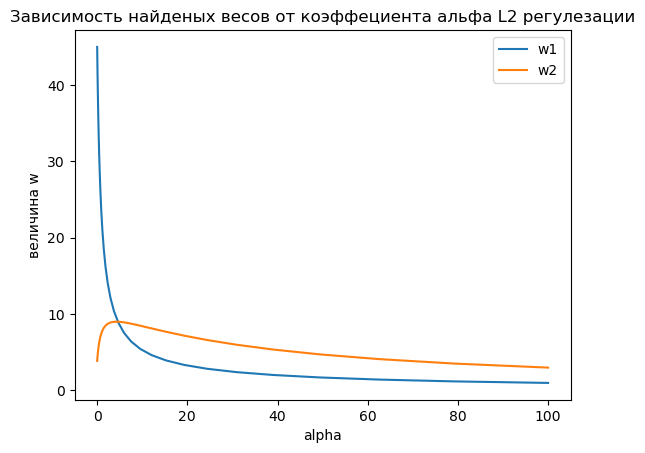

In [7]:
plt.plot(alpha_list, W_list[1:,0], label='w1')
plt.plot(alpha_list, W_list[1:,1], label='w2')
plt.title('Зависимость найденых весов от коэффециента альфа L2 регулезации')
plt.xlabel('alpha')
plt.ylabel('величина w')
plt.legend()

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Ответ: технически можно, но на вопрос где это может быть нужно не могу ответить

3.Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [11]:
def gradient_descent_reg_l1(X, y, iterations, eta=0.01, reg=0.001):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) 
        dReg = reg  # производная от alpha * w по w даст просто alpha
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [23]:
W_L1 = gradient_descent_reg_l1(X, y, 1000, reg = 0.001)
W_L2 = gradient_descent_reg_l2(X, y, 1000, reg = 0.001) 

Iter: 0, weights: [-0.74213231  4.46284757], error 3354.79589092293
Iter: 100, weights: [27.2757035   7.03782764], error 195.73132522282918
Iter: 200, weights: [37.94644452  5.10285328], error 68.25983160157968
Iter: 300, weights: [42.21522802  4.32877521], error 47.857621392456416
Iter: 400, weights: [43.92293628  4.01910864], error 44.591676187693416
Iter: 500, weights: [44.60609753  3.89522788], error 44.06866705130818
Iter: 600, weights: [44.87939322  3.84566992], error 43.984831021272726
Iter: 700, weights: [44.98872397  3.82584448], error 43.9713600014329
Iter: 800, weights: [45.03246126  3.81791339], error 43.96918246648766
Iter: 900, weights: [45.04995817  3.8147406 ], error 43.96882530845978
Final MSE: 43.96876468057082
Iter: 0, weights: [-0.17138414  4.40111515], error 3305.2148674949326
Iter: 100, weights: [27.4910283   6.99847394], error 192.0740968281391
Iter: 200, weights: [38.01191543  5.09067328], error 67.81217465314862
Iter: 300, weights: [42.21650508  4.32823577], er

In [24]:
W_L1

array([45.05691478,  3.81347913])

In [25]:
W_L2

array([45.0107885 ,  3.82153556])